In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

68.86224435802322 25.240331120417608
-19.417964582686025 -12.247043738898128
1.9658505047286639 -3.9963282072498885
-43.385664985257414 107.0810874053696
53.62892078145214 80.16529340883449
85.708410914392 95.71232581819152
-15.42952635387708 74.85993865592039
74.64072468634802 -53.275430238604116
-35.01908910005174 -147.19173487535417
17.511272954770178 -137.65767826129866
35.206892869535096 47.37973276204593
-63.05174661975403 15.050956074718755
-48.41735989810952 110.32635199084336
-86.00245963142251 -150.06553302298389
7.961808868478826 167.74768994832988
-81.35710024142911 -137.93665728993037
80.05474533571487 -114.84749660278156
-79.00436495036577 -137.21200490012274
-87.48274777078788 -60.13503423229368
83.20655853832304 -112.55654369232477
50.98290937066426 153.69968955778728
-44.37559916683403 -174.51284979531238
72.99477466300996 -155.6185533344654
-20.766143308591722 -66.65984230084364
-35.31267523218846 31.458273787719463
-73.5311972785013 82.34224804746702
-78.762679756839

16.19643071414589 -86.9720650692485
-40.971777337936125 41.38250635517687
-84.94617388999643 67.81300486865342
-59.91707832968632 158.20987028145493
-71.287163929529 -107.05460373101032
42.247074218081025 127.37410653591769
29.498996772962485 101.30613193221706
-42.01651970404593 88.14502897900587
88.28559179065806 148.8315736824248
-6.422479347476752 5.600628579548555
-71.44889122529942 63.58857848313386
59.94818008069274 68.90064268486415
23.630993337652257 -32.52286194024856
-26.462162827740364 -175.6784692116792
5.774080628229413 115.21517221010879
-88.3076722254955 -37.98911422250498
-40.389530243831054 136.44579795329804
-67.78268256519597 40.50348382493107
-84.0911598128965 20.56388141328506
4.389761017925011 42.410337384133896
-64.9675215731614 -144.96981461381392
-63.034319507616864 1.2795276338747499


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list with enumerate() method.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_weather_description = city_weather["weather"][0]["description"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Current Description": city_weather_description,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karasjok
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | jacqueville
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pankrushikha
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | sanandaj
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | uyuni
Processing Record 22 of Set 1 | umzimvubu
City not found. Skipping...
Processing Re

Processing Record 37 of Set 4 | souillac
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 40 of Set 4 | burdur
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | abu samrah
Processing Record 43 of Set 4 | narrabri
Processing Record 44 of Set 4 | bumba
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | ferrol
Processing Record 47 of Set 4 | valdivia
Processing Record 48 of Set 4 | lethem
Processing Record 49 of Set 4 | balotra
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | nadym
Processing Record 2 of Set 5 | somerset
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | trofors
Processing Record 5 of Set 5 | port-gentil
Processing Record 6 of Set 5 | calama
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | salisbury
Processing Record 9 of Set 5 | vao
Processing Record 10 of Se

City not found. Skipping...
Processing Record 25 of Set 8 | nanortalik
Processing Record 26 of Set 8 | sorong
Processing Record 27 of Set 8 | mmabatho
Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | madingou
Processing Record 30 of Set 8 | buritis
Processing Record 31 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 32 of Set 8 | shawnee
Processing Record 33 of Set 8 | fare
Processing Record 34 of Set 8 | usogorsk
Processing Record 35 of Set 8 | manasa
Processing Record 36 of Set 8 | tshikapa
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | ankazoabo
Processing Record 39 of Set 8 | los andes
Processing Record 40 of Set 8 | fukue
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | pevek
Processing Record 43 of Set 8 | sindor
Processing Record 44 of Set 8 | havre
Processing Record 45 of Set 8 | ahipara
Processing Record 46 of Set 8 | faya
Processing Record 47 of Set 8 | isangel
Processing Record 48 of 

Processing Record 17 of Set 12 | binzhou
Processing Record 18 of Set 12 | raga
Processing Record 19 of Set 12 | biltine
Processing Record 20 of Set 12 | ust-ilimsk
Processing Record 21 of Set 12 | dolores
Processing Record 22 of Set 12 | medvezhyegorsk
Processing Record 23 of Set 12 | vicksburg
Processing Record 24 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 25 of Set 12 | foso
Processing Record 26 of Set 12 | at-bashi
Processing Record 27 of Set 12 | sattahip
Processing Record 28 of Set 12 | vestmanna
Processing Record 29 of Set 12 | xihe
Processing Record 30 of Set 12 | longyan
Processing Record 31 of Set 12 | astrea
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | mount pleasant
Processing Record 34 of Set 12 | bo rai
Processing Record 35 of Set 12 | penzance
Processing Record 36 of Set 12 | ketchikan
Processing Record 37 of Set 12 | saquena
Processing Record 38 of Set 12 | korgen
Processing Record 39 of Set 12 | magadi
Processing 

In [11]:
# Tally number of cities.
len(city_data)

575

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Current Description,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karasjok,69.4719,25.5112,overcast clouds,48.47,92,100,3.76,NO,2022-07-24 22:18:04
1,Jamestown,42.0970,-79.2353,scattered clouds,85.64,67,40,14.97,US,2022-07-24 22:16:58
2,Jacqueville,5.2052,-4.4146,overcast clouds,76.96,79,95,9.73,CI,2022-07-24 22:18:04
3,Busselton,-33.6500,115.3333,overcast clouds,58.08,71,90,15.77,AU,2022-07-24 22:18:05
4,Pankrushikha,53.8319,80.3406,scattered clouds,50.04,95,30,5.93,RU,2022-07-24 22:18:05
5,Khatanga,71.9667,102.5000,moderate rain,61.14,85,97,6.80,RU,2022-07-24 22:18:05
6,Hithadhoo,-0.6000,73.0833,overcast clouds,81.90,73,100,6.58,MV,2022-07-24 22:18:06
7,Upernavik,72.7868,-56.1549,overcast clouds,41.70,95,100,6.40,GL,2022-07-24 22:18:06
8,Mataura,-46.1927,168.8643,few clouds,36.48,88,17,2.30,NZ,2022-07-24 22:18:06
9,Hilo,19.7297,-155.0900,broken clouds,87.28,72,75,11.50,US,2022-07-24 22:14:58


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karasjok,NO,2022-07-24 22:18:04,69.4719,25.5112,48.47,92,100,3.76
1,Jamestown,US,2022-07-24 22:16:58,42.0970,-79.2353,85.64,67,40,14.97
2,Jacqueville,CI,2022-07-24 22:18:04,5.2052,-4.4146,76.96,79,95,9.73
3,Busselton,AU,2022-07-24 22:18:05,-33.6500,115.3333,58.08,71,90,15.77
4,Pankrushikha,RU,2022-07-24 22:18:05,53.8319,80.3406,50.04,95,30,5.93
5,Khatanga,RU,2022-07-24 22:18:05,71.9667,102.5000,61.14,85,97,6.80
6,Hithadhoo,MV,2022-07-24 22:18:06,-0.6000,73.0833,81.90,73,100,6.58
7,Upernavik,GL,2022-07-24 22:18:06,72.7868,-56.1549,41.70,95,100,6.40
8,Mataura,NZ,2022-07-24 22:18:06,-46.1927,168.8643,36.48,88,17,2.30
9,Hilo,US,2022-07-24 22:14:58,19.7297,-155.0900,87.28,72,75,11.50


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
city_data_df = pd.read_csv("weather_data/cities.csv")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658701984.7298613

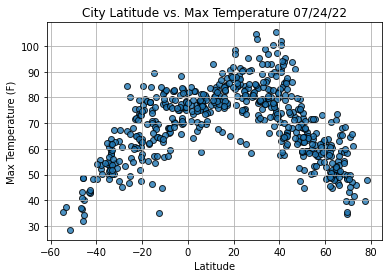

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

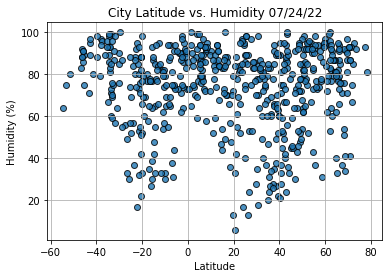

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

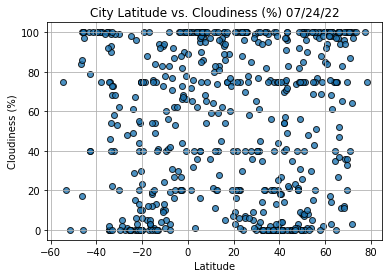

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

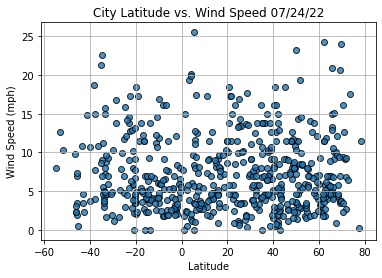

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Find correlation between lat and max temps

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Karasjok,NO,2022-07-24 22:18:04,69.4719,25.5112,48.47,92,100,3.76
1,1,Jamestown,US,2022-07-24 22:16:58,42.0970,-79.2353,85.64,67,40,14.97
2,2,Jacqueville,CI,2022-07-24 22:18:04,5.2052,-4.4146,76.96,79,95,9.73
4,4,Pankrushikha,RU,2022-07-24 22:18:05,53.8319,80.3406,50.04,95,30,5.93
5,5,Khatanga,RU,2022-07-24 22:18:05,71.9667,102.5000,61.14,85,97,6.80


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

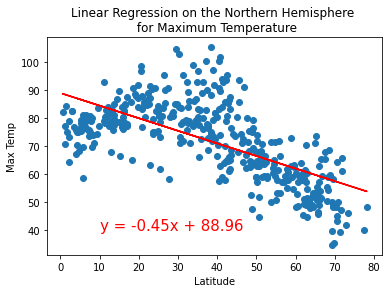

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

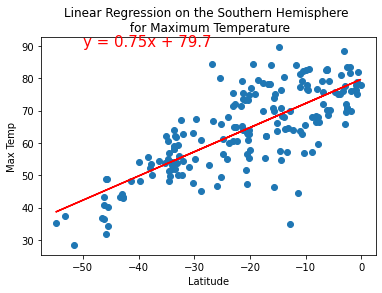

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

## Find correlation between lat and  % humidity

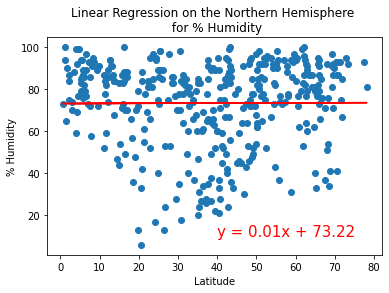

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

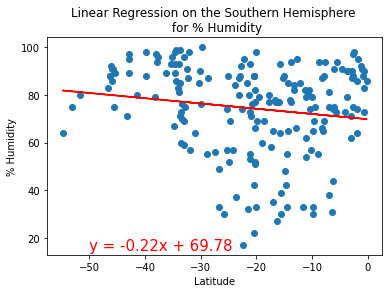

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity','% Humidity',(-50,15))

## Find correlation between lat and % cloudiness

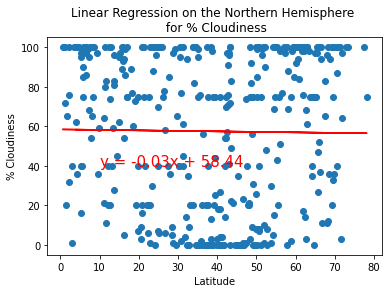

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

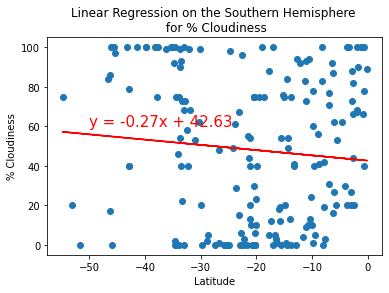

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

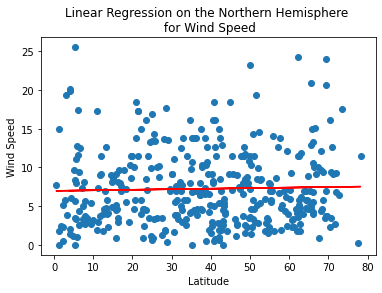

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

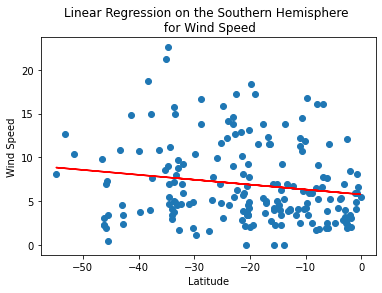

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [35]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Karasjok,NO,2022-07-24 22:18:04,69.4719,25.5112,48.47,92,100,3.76
1,1,Jamestown,US,2022-07-24 22:16:58,42.0970,-79.2353,85.64,67,40,14.97
2,2,Jacqueville,CI,2022-07-24 22:18:04,5.2052,-4.4146,76.96,79,95,9.73
3,3,Busselton,AU,2022-07-24 22:18:05,-33.6500,115.3333,58.08,71,90,15.77
4,4,Pankrushikha,RU,2022-07-24 22:18:05,53.8319,80.3406,50.04,95,30,5.93


In [36]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [37]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [38]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [39]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=[max(temp,0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig =gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [44]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Jamestown,US,2022-07-24 22:16:58,42.0970,-79.2353,85.64,67,40,14.97
2,2,Jacqueville,CI,2022-07-24 22:18:04,5.2052,-4.4146,76.96,79,95,9.73
6,6,Hithadhoo,MV,2022-07-24 22:18:06,-0.6000,73.0833,81.90,73,100,6.58
9,9,Hilo,US,2022-07-24 22:14:58,19.7297,-155.0900,87.28,72,75,11.50
13,13,Butaritari,KI,2022-07-24 22:15:17,3.0707,172.7902,82.47,70,1,19.39
14,14,Rikitea,PF,2022-07-24 22:18:08,-23.1203,-134.9692,75.54,80,67,14.58
18,18,Vaini,TO,2022-07-24 22:18:09,-21.2000,-175.2000,75.36,73,40,8.05
22,22,Bengkulu,ID,2022-07-24 22:18:10,-3.8004,102.2655,75.15,90,100,5.30
25,25,Saint Anthony,US,2022-07-24 22:15:35,45.0205,-93.2180,80.53,45,0,18.41
26,26,Kloulklubed,PW,2022-07-24 22:18:11,7.0419,134.2556,75.70,73,99,7.40


In [45]:
preferred_cities_df.count()

City_ID       207
City          207
Country       207
Date          207
Lat           207
Lng           207
Max Temp      207
Humidity      207
Cloudiness    207
Wind Speed    207
dtype: int64

In [46]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Jamestown,US,85.64,42.0970,-79.2353,
2,Jacqueville,CI,76.96,5.2052,-4.4146,
6,Hithadhoo,MV,81.90,-0.6000,73.0833,
9,Hilo,US,87.28,19.7297,-155.0900,
13,Butaritari,KI,82.47,3.0707,172.7902,
14,Rikitea,PF,75.54,-23.1203,-134.9692,
18,Vaini,TO,75.36,-21.2000,-175.2000,
22,Bengkulu,ID,75.15,-3.8004,102.2655,
25,Saint Anthony,US,80.53,45.0205,-93.2180,
26,Kloulklubed,PW,75.70,7.0419,134.2556,


In [47]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [48]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
   
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [49]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Jamestown,US,85.64,42.0970,-79.2353,Hampton Inn & Suites Jamestown
2,Jacqueville,CI,76.96,5.2052,-4.4146,Hotel Le Martin Pecheur
6,Hithadhoo,MV,81.90,-0.6000,73.0833,Scoop Guest House
9,Hilo,US,87.28,19.7297,-155.0900,Hilo Hawaiian Hotel
13,Butaritari,KI,82.47,3.0707,172.7902,Isles Sunset Lodge
14,Rikitea,PF,75.54,-23.1203,-134.9692,People ThankYou
18,Vaini,TO,75.36,-21.2000,-175.2000,Keleti Beach Resort
22,Bengkulu,ID,75.15,-3.8004,102.2655,Grage Hotel Bengkulu
25,Saint Anthony,US,80.53,45.0205,-93.2180,Holiday Inn Express Roseville-St. Paul
26,Kloulklubed,PW,75.70,7.0419,134.2556,Storyboard Beach Resort


In [53]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]